# Hecho por Mario Alejandro Castro Lerma
## Para la clase de ingenieria de caracteristicas
### Analizando un grupo de WhatsApp

## Creando el Dataframe

El archivo de whatsapp viene como zip, asi que lo primero es abrirlo

In [155]:
# # importing the zipfile module
# from zipfile import ZipFile

# with ZipFile("/content/WhatsAppChatAnonimoAnalisis.zip", 'r') as zipObj:
#    # Extract all the contents of zip file in current directory
#    zipObj.extractall()

El zip contiene:

*   WhatsAppChatAnonimo.txt

Hay que convertir todos los nombres a una forma anonima:

In [156]:
# # Open the file in read mode
# file_path = '/content/WhatsAppChat.txt'

# try:
#     with open(file_path, 'r') as file:
#         # Read the content of the file
#         file_content = file.read()


# except FileNotFoundError:
#     print(f"File '{file_path}' not found.")
# except Exception as e:
#     print(f"An error occurred: {e}")

In [157]:
# file_content_lower = file_content.lower()
# NombresM = []
# for nombre in NombresM:
#   file_content_lower = file_content_lower.replace(nombre, 'Anonimo_1')

# NombresA = []
# for nombre in NombresA:
#   file_content_lower = file_content_lower.replace(nombre, 'Anonimo_2')

# NombresD = []
# for nombre in NombresD:
#   file_content_lower = file_content_lower.replace(nombre, 'Anonimo_3')

# NombresJD = []
# for nombre in NombresJD:
#   file_content_lower = file_content_lower.replace(nombre, 'Anonimo_4')

# NombresK = []
# for nombre in NombresK:
#   file_content_lower = file_content_lower.replace(nombre, 'Anonimo_5')

# NombresMU = []
# for nombre in NombresMU:
#   file_content_lower = file_content_lower.replace(nombre, 'Anonimo_6')

# NombresS = []
# for nombre in NombresS:
#   file_content_lower = file_content_lower.replace(nombre, 'Anonimo_7')

In [158]:
# with open('anonymized_chat.txt', 'w') as f:
#     f.write(file_content_lower)

Ahora hay que convertirlo a un Dataframe.

***El codigo con los nombres reales para anonimizar el chat lo hice en una libreta separada, para mantener la anonimacion***

***El archivo que usare es anonymized_chat.txt***

In [159]:
# Abrimos el archivo
file_path = '/content/anonymized_chat.txt'

try:
    with open(file_path, 'r') as file:
        file_content = file.read()

        # print("File Content:\n", file_content)

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [160]:
import pandas as pd

df = pd.read_csv('/content/anonymized_chat.txt', sep='\t', header=None)
df.head()

,0
0,"10/5/23, 3:46 pm - messages and calls are end-..."
1,"10/5/23, 3:46 pm - you created this group"
2,"10/5/23, 3:47 pm - you added Anonimo_3, Anonim..."
3,"10/5/23, 3:47 pm - Anonimo_1: ya que espero qu..."
4,"10/5/23, 3:48 pm - Anonimo_7: ojalá si"


Ahora hay que separar la información en columnas que podamos utilizar:

In [161]:
# En esta seccion utilize regex inicialmente pero finalmente era más efectivo
# utilizar las funciones de pandas.

# Dropeamos los primeros 3 mensajes que son default de whatsapp
df = df.drop(df.index[0:3])

# La separacion es clara en fecha y mensaje asi que lo separamos
df['Date'] = df[0].str.split('-', expand=True)[0]
df['Message'] = df[0].str.split('-', expand=True)[1]

# Separamos Hora y Fecha
df['Hour'] = df['Date'].str.split(', ', expand=True)[1]
df['Date'] = df['Date'].str.split(', ', expand=True)[0]

# Separamos el usuario del mensaje
# Uso el formato "User: text" pero pueden haber falsos positivos
mask = df['Message'].str.contains(":", na=False)
df = df[mask]

# Separo el Usuario del Mensaje
df[['User', 'Message']] = df['Message'].str.split(':', n=1, expand=True)

# Quitar espacios
df['User'] = df['User'].str.strip()
df['Message'] = df['Message'].str.strip()

# Columna para saber si es Media
df['Media'] = df['Message'].str.contains('<media omitted>', regex=False).astype(bool)

# Conteo de palabras
df['Word_Count'] = df['Message'].str.split().str.len()

df.head()

,0,Date,Message,Hour,User,Media,Word_Count
3,"10/5/23, 3:47 pm - Anonimo_1: ya que espero qu...",10/5/23,ya que espero que no sea una sola vez que invi...,3:47 pm,Anonimo_1,False,12
4,"10/5/23, 3:48 pm - Anonimo_7: ojalá si",10/5/23,ojalá si,3:48 pm,Anonimo_7,False,2
5,"10/5/23, 4:02 pm - Anonimo_2: <media omitted>",10/5/23,<media omitted>,4:02 pm,Anonimo_2,True,2
6,"10/5/23, 4:08 pm - Anonimo_1: oigan de la smas...",10/5/23,"oigan de la smash bolita, me faltó invitar a a...",4:08 pm,Anonimo_1,False,10
7,"10/5/23, 4:09 pm - Anonimo_3: al heriberto",10/5/23,al heriberto,4:09 pm,Anonimo_3,False,2


In [162]:
# Dropeamos la columna inicial 0
df = df.drop(columns=[0])

df.head()

,Date,Message,Hour,User,Media,Word_Count
3,10/5/23,ya que espero que no sea una sola vez que invi...,3:47 pm,Anonimo_1,False,12
4,10/5/23,ojalá si,3:48 pm,Anonimo_7,False,2
5,10/5/23,<media omitted>,4:02 pm,Anonimo_2,True,2
6,10/5/23,"oigan de la smash bolita, me faltó invitar a a...",4:08 pm,Anonimo_1,False,10
7,10/5/23,al heriberto,4:09 pm,Anonimo_3,False,2


In [163]:
df.shape

(37099, 6)

In [164]:
df['User'].unique()

array(['Anonimo_1', 'Anonimo_7', 'Anonimo_2', 'Anonimo_3',
       'Anonimo_4 Anonimo_3', 'Anonimo_5', 'Anonimo_6', 'meta ai',
       '*dhalsim*', '*e. honda*', '*marisa*', '*guile*', '*rashid*',
       '*toronto*', '*montreal*', '*mississauga*', '*vancouver*',
       '*niagara*', '*thompson, manitoba*',
       '*north battleford, saskatchewan*', '*red deer, alberta*',
       '*asbestos, quebec*', '*winnipeg, manitoba*',
       '*that time i got reincarnated as a slime* ¹',
       '*no longer allowed in another world* ¹', '*shy* ¹',
       '*spice and wolf', 'mark zuckerberg', 'yann lecun',
       'joelle pineau', 'jason weston', '*spren', '*shardbearers',
       '*the recreance'], dtype=object)

El ruido de usuarios es una cantidad pequeña asi que parece ser seguro dropear esos renglones:

In [165]:
# Dejar solo "Anonimo_1", "Anonimo_2", etc. Utilizando regex para encontrarlos.
df['User'] = df['User'].str.extract(r'(Anonimo_\d+)')
df = df.dropna(subset=['User'])
print(df.shape)
print(df['User'].unique())

(36573, 6)
['Anonimo_1' 'Anonimo_7' 'Anonimo_2' 'Anonimo_3' 'Anonimo_4' 'Anonimo_5'
 'Anonimo_6']


Perdimos unos 500 mensajes al eliminar los usuarios que agarre accidentalmente

### Ahora les asigno nombres de personajes ficticios:

In [166]:
# Les voy a poner nombres de personajes ahora que ya limpie
user_map = {
    "Anonimo_1": "Zangief",
    "Anonimo_2": "Aki",
    "Anonimo_3": "Manon",
    "Anonimo_4": "Luke",
    "Anonimo_5": "Cloud",
    "Anonimo_6": "Rashid",
    "Anonimo_7": "Ryu"
}

df['User'] = df['User'].replace(user_map)

for anon, char in user_map.items():
    df['Message'] = df['Message'].str.replace(anon, char, regex=False)

print(df['User'].unique())


['Zangief' 'Ryu' 'Aki' 'Manon' 'Luke' 'Cloud' 'Rashid']


## Analisis y Exploración de datos

Estadisticas generales

In [167]:
# Estadisticas
print("NaN values: \n", df.isna().sum())
print("\n Word_Count: \n", df['Word_Count'].describe())
print("\n User: \n", df['User'].describe())
print("\n Media: \n", df['Media'].describe())

print(f"\nEsto significa que hay 36573 mensajes en total.")
print(f"\nHay {36573 - 32569} mensajes que son de Media")
print(f"\nHay 7 usuarios")
print(f"\nEn promedio los mensajes son de 3 palabras")


NaN values: 
 Date          0
Message       0
Hour          0
User          0
Media         0
Word_Count    0
dtype: int64

 Word_Count: 
 count    36573.000000
mean         4.505510
std          4.117917
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        102.000000
Name: Word_Count, dtype: float64

 User: 
 count     36573
unique        7
top         Aki
freq       8665
Name: User, dtype: object

 Media: 
 count     36573
unique        2
top       False
freq      32569
Name: Media, dtype: object

Esto significa que hay 36573 mensajes en total.

Hay 4004 mensajes que son de Media

Hay 7 usuarios

En promedio los mensajes son de 3 palabras


In [168]:
print('La cantidad promedio de mensajes por usuario es: ', df.groupby("User").size().median())

La cantidad promedio de mensajes por usuario es:  5128.0


### Creando la nube de palabras

Para hacer la wordcloud se ocupan las librerias siguientes:

In [169]:
!pip install wordcloud

!pip install nltk

In [170]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


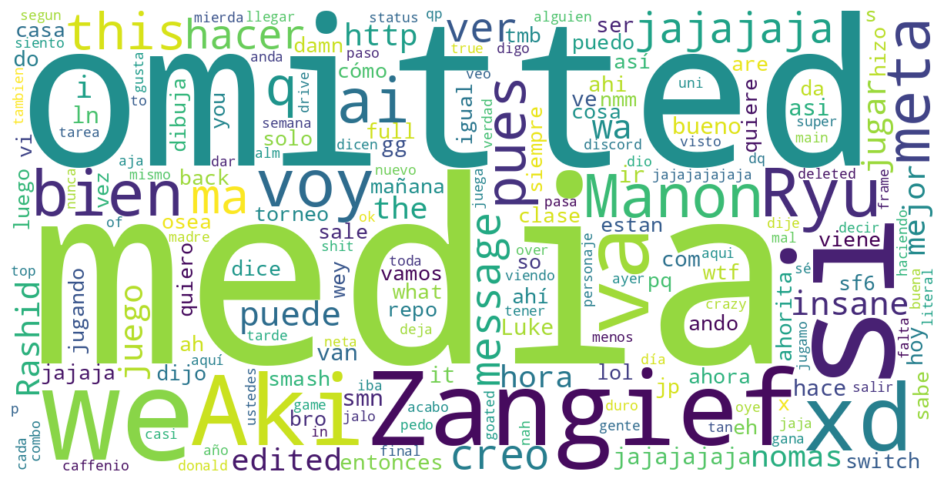

In [171]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Juntar los mensajes
text = " ".join(msg for msg in df['Message'].dropna())

# Obtener las stopwords para español
spanish_stopwords = set(stopwords.words("spanish"))

# Generar wordcloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=spanish_stopwords,
    collocations=False
).generate(text)

# graficarlo
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Parece que las "palabras" que mas utilizamos es "omitted media", asi que la mayor cantidad de comunicacion la hacemos a traves de media en este grupo.

Como será sin esto y otras stopwords?

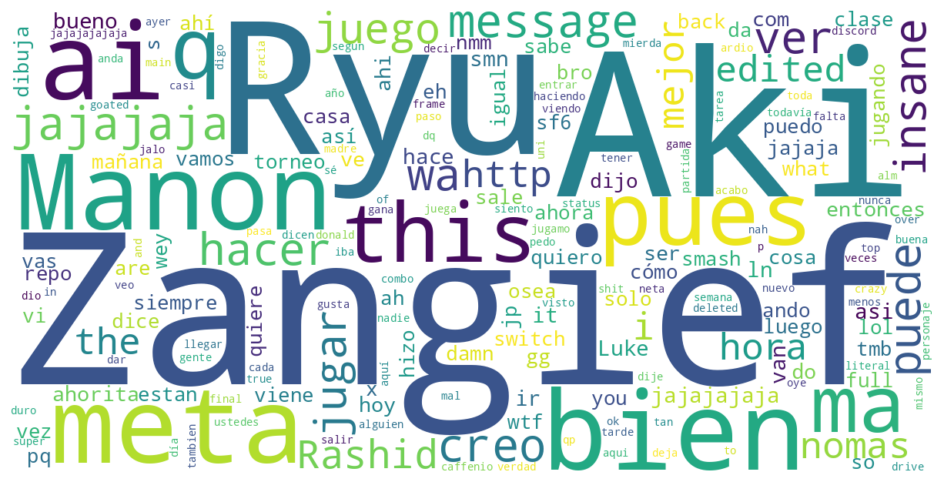

In [172]:
# Quitamos Media
df_no_media = df[df['Media'] == False]

# Juntar mensajes
text = " ".join(msg for msg in df_no_media['Message'])

# Quitamos más palabras
spanish_stopwords.update(["jaja", "aja", "xd", "si", "we", "voy", "va", "bien" "jajaja", "ajajaja"])

# Volvemos a generar
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=spanish_stopwords,
    collocations=False
).generate(text)

# Mostrar grafica
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Parece ser que las palabras que más decimos en este grupo es el nombre de "Ryu", "Aki" y "Zangief". De palabras normales parece ser que "meta", "jajaja" de varios tamaños y "bien".

### Quienes son los que mas escriben?

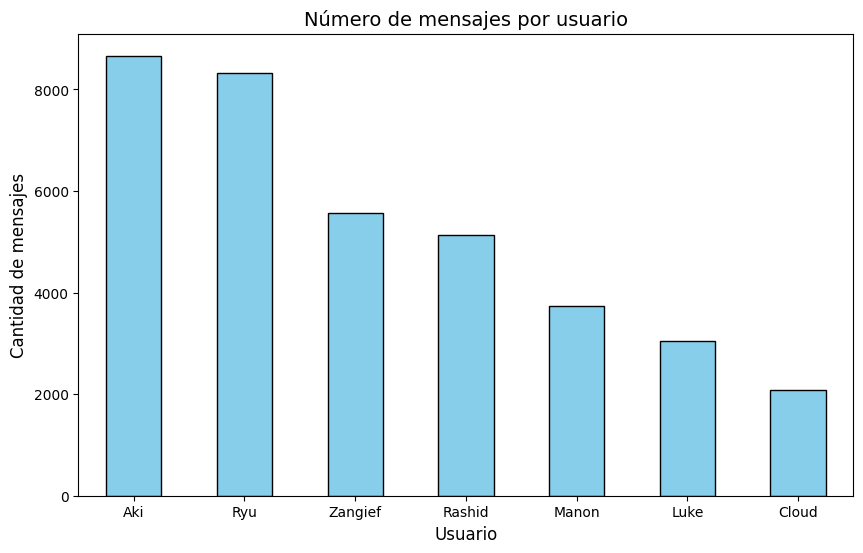

In [173]:
# Conteo por usuario
msg_counts = df['User'].value_counts()

# Plot
plt.figure(figsize=(10,6))
msg_counts.plot(kind='bar', color="skyblue", edgecolor="black")

plt.title("Número de mensajes por usuario", fontsize=14)
plt.xlabel("Usuario", fontsize=12)
plt.ylabel("Cantidad de mensajes", fontsize=12)
plt.xticks(rotation=0)

plt.show()


Las personas que más escriben son **Aki** y **Ryu**, seguidos por **Zangief**

### Que horas son las más activas?

In [174]:
# Agarramos la hora y la procesamos con pandas
times = df['Hour'].astype(str).str.replace('.', '', regex=False).str.strip()
df['Hour_int'] = pd.to_datetime(times, format='%I:%M %p').dt.hour

# Contamos cuantas palabras por hora
hour_counts = df['Hour_int'].value_counts().reindex(range(24), fill_value=0).sort_index()
print(hour_counts)

Hour_int
0      465
1      174
2       15
3        2
4        0
5        7
6       97
7      723
8     2014
9     2969
10    3036
11    2174
12    3146
13    1617
14    2258
15    2157
16    1576
17    1436
18    2004
19    2589
20    2634
21    1874
22    2509
23    1097
Name: count, dtype: int64


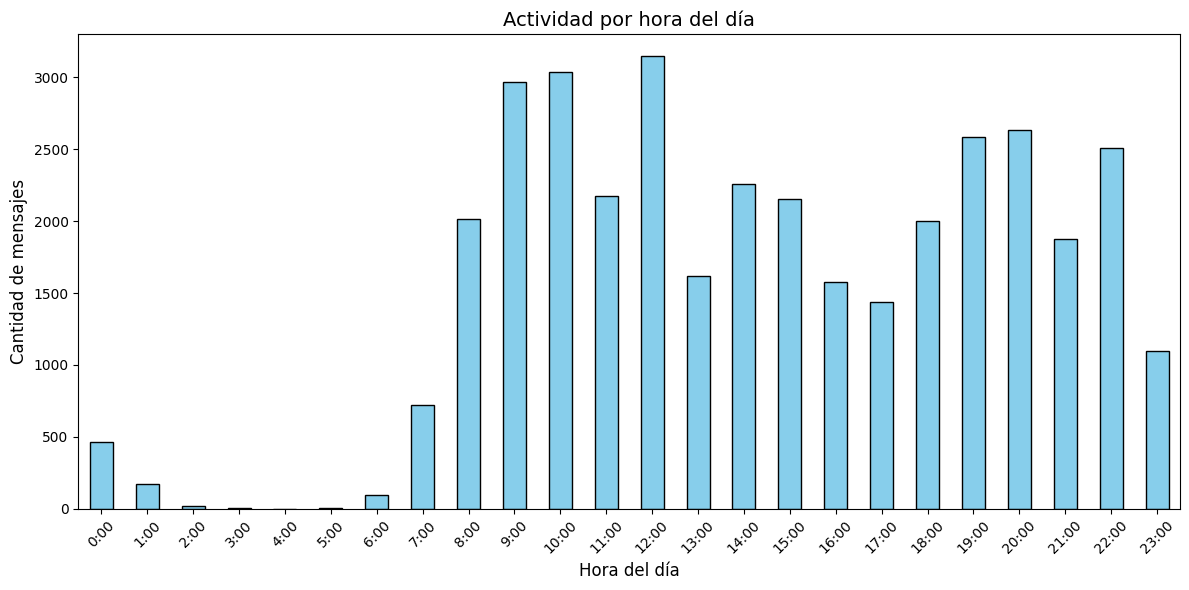

In [175]:
# Plot
plt.figure(figsize=(12,6))
hour_counts.plot(kind='bar', color="skyblue", edgecolor="black")

plt.title("Actividad por hora del día", fontsize=14)
plt.xlabel("Hora del día", fontsize=12)
plt.ylabel("Cantidad de mensajes", fontsize=12)
plt.xticks(range(24), [f"{h}:00" for h in range(24)], rotation=45)
plt.tight_layout()
plt.show()

Las horas más activas del grupo parecen ser las **12:00**, después las **10:00** y finalmente las **9:00**

### Que dias de la semana son los más activos?

In [176]:
# Formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Dia de la semana usando pandas
df['DayOfWeek'] = df['Date'].dt.day_name()

weekday_counts = (
    df['DayOfWeek']
    .value_counts()
    .reindex([
        "Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"
    ], fill_value=0)
)

print(weekday_counts)


DayOfWeek
Monday       5901
Tuesday      6487
Wednesday    5691
Thursday     4923
Friday       5255
Saturday     4742
Sunday       3574
Name: count, dtype: int64


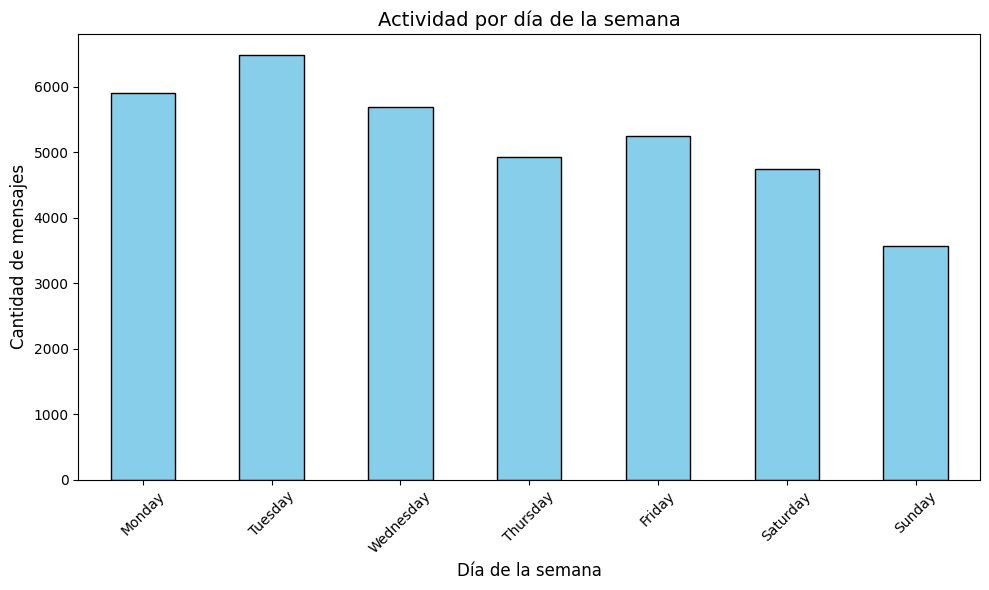

In [177]:
plt.figure(figsize=(10,6))
weekday_counts.plot(kind='bar', color="skyblue", edgecolor="black")

plt.title("Actividad por día de la semana", fontsize=14)
plt.xlabel("Día de la semana", fontsize=12)
plt.ylabel("Cantidad de mensajes", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Martes parece ser el día más activo de la semana, seguido de lunes y miercoles.

### Tipos de textos

In [178]:
# Total de mensajes por usuario
total_msgs = df.groupby("User")['Message'].count()

# Total de media por persona
media_msgs = df.groupby("User")['Media'].sum()
print(media_msgs)

User
Aki        1240
Cloud        81
Luke        434
Manon        68
Rashid      720
Ryu         933
Zangief     528
Name: Media, dtype: int64


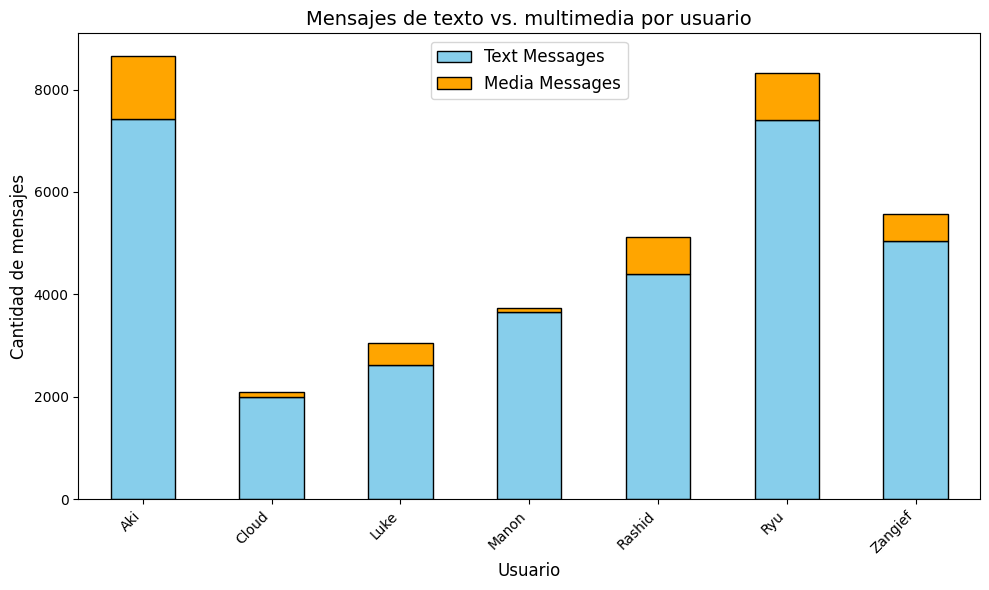

In [179]:
# Total de mensajes de texto
text_msgs = total_msgs - media_msgs

# Combinamos para graficarlo
user_msgs = pd.DataFrame({
    "Text Messages": text_msgs,
    "Media Messages": media_msgs
})

user_msgs.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=["skyblue", "orange"],
    edgecolor="black"
)

plt.title("Mensajes de texto vs. multimedia por usuario", fontsize=14)
plt.xlabel("Usuario", fontsize=12)
plt.ylabel("Cantidad de mensajes", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Parece ser que las 2 personas que mandan más mensajes son las mismas personas que mandan la mayor cantidad de Media, sin embargo la tercera persona que manda más mensajes no es la tercera persona que más media manda.

### Que hora es más activa para cada usuario?

In [180]:
# Count messages per user per hour
user_hour_counts = df.groupby(["User", "Hour_int"]).size().reset_index(name="count")

# For each user, find the hour with the maximum count
most_active_hour_per_user = user_hour_counts.loc[
    user_hour_counts.groupby("User")['count'].idxmax()
]

print(most_active_hour_per_user)

        User  Hour_int  count
5        Aki         9    778
38     Cloud        19    219
51      Luke        10    324
71     Manon         9    373
104   Rashid        20    492
117      Ryu        12    705
139  Zangief        12    475


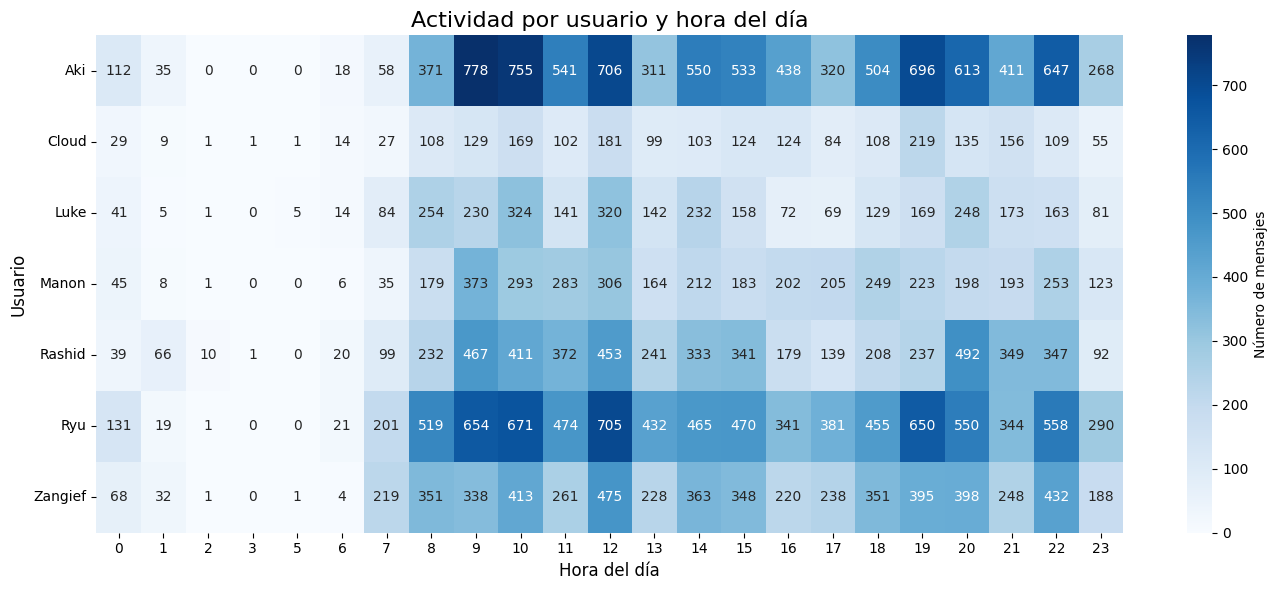

In [181]:
import seaborn as sns

# Pivot: renglones = User, columnas = Hour, valores = message count
heatmap_data = df.groupby(["User", "Hour_int"]).size().unstack(fill_value=0)
# print(heatmap_data)
plt.figure(figsize=(14,6))
sns.heatmap(
    heatmap_data,
    cmap="Blues",
    # linewidths=.5,
    fmt='g',
    annot=True,
    cbar_kws={'label': 'Número de mensajes'}
)

plt.title("Actividad por usuario y hora del día", fontsize=16)
plt.xlabel("Hora del día", fontsize=12)
plt.ylabel("Usuario", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Se puede ver claro como aumenta la actividad despues de las 7 para todos los usuarios y como Aki es la persona más activa.

### Cual es el mensaje más largo de cada usuario?
 Con base a cantidad de palabras

In [182]:
# Find the index of the longest message for each user
longest_msg_idx = df.groupby("User")["Word_Count"].idxmax()

# Extract those rows
longest_msgs = df.loc[longest_msg_idx, ["User", "Message", "Word_Count"]]

print(longest_msgs)


          User                                            Message  Word_Count
36088      Aki  a mi lo que mas me llamo la atencion era un ca...          38
12257    Cloud  de que "ptm, cómo que no hay estacionamiento e...          37
22594     Luke  tengo un compa, exalumno de lcc que trabaja en...          63
36193    Manon  jueves de 9 am a 6pm y el viernes de 9 am a 4 ...          35
18416   Rashid  generate a video based on this image. the guy ...          72
24765      Ryu  en el script de global hay una variable nueva ...          33
22466  Zangief  me toca de jp a manon a jp a manon a jp a mano...         102


### Cual fue el mes más activo del grupo?

In [183]:
# Columna para el mes
df["Month"] = df["Date"].dt.to_period("M")
# Meses
month_counts = df.groupby("Month").size()

print(month_counts)

Month
2023-10     150
2023-11      37
2023-12      57
2024-01     342
2024-02     465
2024-03    1161
2024-04    1758
2024-05    1127
2024-06    1344
2024-07    3859
2024-08    3516
2024-09    3914
2024-10    1560
2024-11    1607
2024-12    1380
2025-01     962
2025-02    1422
2025-03    1557
2025-04    1407
2025-05    2724
2025-06    1936
2025-07    1836
2025-08    1604
2025-09     847
2025-10       1
Freq: M, dtype: int64


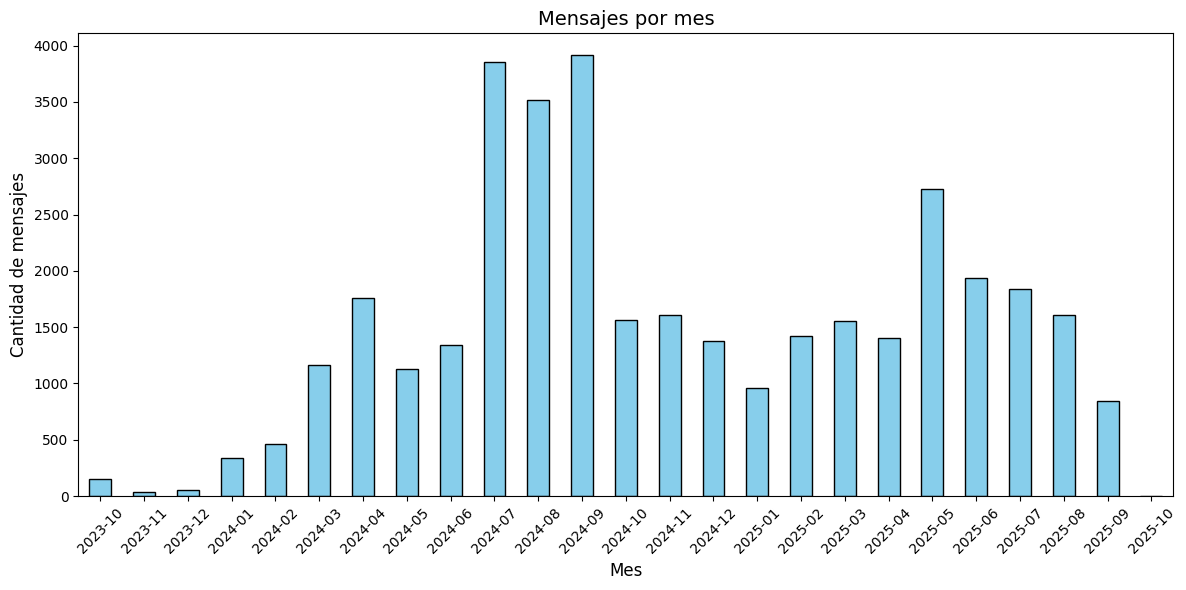

In [184]:
month_counts.plot(kind="bar", figsize=(12,6), color="skyblue", edgecolor="black")

plt.title("Mensajes por mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad de mensajes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Parece que el mes más activo que tuvo el grupo fue septimebre del 2024 y octubre del 2025 apenas va iniciando.